In [1]:
import numpy as np

In [2]:
import tensorflow as tf

In [3]:
import matplotlib.patches as mpatches

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [6]:
plt.rcParams['figure.figsize'] = (10, 6)

In [7]:
X = np.arange(0.0, 5.0, 0.1)
X

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9])

In [10]:
a=1
b=0

Y = a*X + b

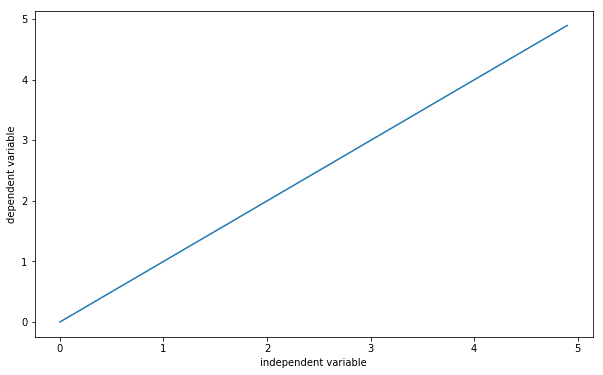

In [12]:
plt.plot(X,Y)
plt.ylabel('dependent variable')
plt.xlabel('independent variable')

In [13]:
x_data = np.random.rand(100).astype(np.float32)
x_data

array([ 0.22251801,  0.6854946 ,  0.16954744,  0.89488113,  0.36578178,
        0.69636649,  0.10055942,  0.47663113,  0.1408525 ,  0.80490834,
        0.24262094,  0.6880765 ,  0.88573253,  0.38498592,  0.79454559,
        0.66355854,  0.15877225,  0.72183925,  0.11035273,  0.37302205,
        0.45817912,  0.30007976,  0.31055084,  0.79721653,  0.45383719,
        0.18596929,  0.15958051,  0.06897219,  0.86753291,  0.94938105,
        0.13388102,  0.40357426,  0.53928977,  0.93050683,  0.00254653,
        0.94150734,  0.35456139,  0.60581887,  0.42581266,  0.68980217,
        0.36153212,  0.51812637,  0.01261008,  0.20299067,  0.8211937 ,
        0.41087246,  0.5245288 ,  0.988056  ,  0.07440529,  0.26023427,
        0.14235036,  0.1072623 ,  0.58056259,  0.88896495,  0.94652009,
        0.31629214,  0.9475199 ,  0.30286485,  0.48936602,  0.80286425,
        0.27121806,  0.34755874,  0.51571548,  0.06120693,  0.30891347,
        0.53543687,  0.38753122,  0.51340514,  0.63633341,  0.00

In [14]:
y_data = x_data * 3 + 2
y_data = np.vectorize(lambda y: y + np.random.normal(loc=0.0, scale=0.1))(y_data)

In [19]:
list(zip(x_data,y_data)) [0:5]

[(0.22251801, 2.7008875633276679),
 (0.6854946, 3.8869061844468065),
 (0.16954744, 2.4046375543552934),
 (0.89488113, 4.550305998627465),
 (0.36578178, 3.345479227330403)]

In [20]:
a = tf.Variable(1.0)
b = tf.Variable(0.2)
y = a * x_data + b

In [21]:
loss = tf.reduce_mean(tf.square(y - y_data))

In [22]:
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

In [23]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [24]:
train_data = []
for step in range(100):
    evals = sess.run([train,a,b])[1:]
    if step % 5 == 0:
        print(step, evals)
        train_data.append(evals)

0 [2.5361912, 2.9820764]
5 [2.4410195, 2.2853816]
10 [2.5963476, 2.2042143]
15 [2.7088447, 2.1447601]
20 [2.7905216, 2.1015947]
25 [2.8498218, 2.0702553]
30 [2.8928759, 2.0475018]
35 [2.924135, 2.0309818]
40 [2.94683, 2.0189877]
45 [2.9633076, 2.0102794]
50 [2.9752707, 2.003957]
55 [2.9839563, 1.9993669]
60 [2.9902625, 1.9960341]
65 [2.9948411, 1.9936144]
70 [2.9981651, 1.9918576]
75 [3.0005786, 1.9905822]
80 [3.002331, 1.9896561]
85 [3.0036032, 1.9889838]
90 [3.0045269, 1.9884957]
95 [3.0051975, 1.9881412]


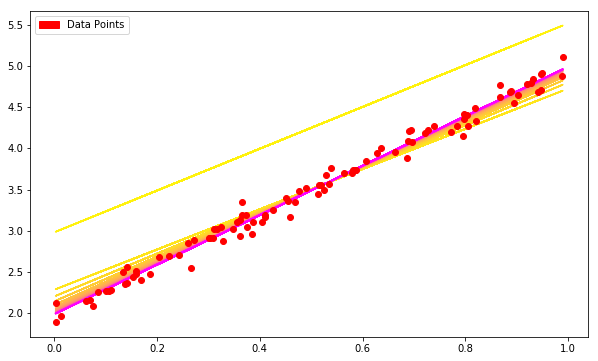

In [25]:
converter = plt.colors
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(x_data)
    line = plt.plot(x_data, f_y)
    plt.setp(line, color=(cr,cg,cb))

plt.plot(x_data, y_data, 'ro')


green_line = mpatches.Patch(color='red', label='Data Points')

plt.legend(handles=[green_line])

plt.show()